# Distinguishing Cited and Repackaged Instances, Topic Modeling, Mapping, & Link Parsing

## Distinguishing Cited and Repackaged Instances

In [1]:
import pandas as pd # used for creating/manipulating data frames

# read in data
foundlinks = pd.read_excel("foundlinks.modeling.October1.xlsx")
foundlinks.head

c:\Users\Ksell\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


<bound method NDFrame.head of                                                    url  \
0    https://www.asbmb.org/asbmb-today/policy/05022...   
1           https://www.connetquotlibrary.org/digital/   
2           https://www.connetquotlibrary.org/digital/   
3           https://www.connetquotlibrary.org/digital/   
4           https://www.connetquotlibrary.org/digital/   
..                                                 ...   
180  https://2017-2021.commerce.gov/index.php/image...   
181  https://2017-2021.commerce.gov/index.php/image...   
182           http://economy.fedprimerate.com/2009/03/   
183           http://economy.fedprimerate.com/2009/03/   
184           http://economy.fedprimerate.com/2009/03/   

                                           Found Links  \
0    https://www.census.gov/library/stories/2019/02...   
1          http://www.census.gov/programs-surveys/acs/   
2     https://www.census.gov/programs-surveys/cbp.html   
3                      https://data.censu

In [2]:
# Perform cleaning again to the data just to be safe

#getting rid of special characters and lower caseing content
pattern = r'[^a-zA-Z0-9\s]'
foundlinks['content'] = foundlinks['content'].str.replace(pattern,'',regex=True)
# Remove new line characters
foundlinks['content'] = foundlinks['content'].str.replace(r'\n', '', regex=True)
foundlinks = foundlinks.applymap(lambda x: x.lower() if isinstance(x, str) else x)

C:\Users\Ksell\AppData\Local\Temp\ipykernel_19364\2461475174.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  foundlinks = foundlinks.applymap(lambda x: x.lower() if isinstance(x, str) else x)


In [3]:
#Sites had multiple found links, combining them to reduce duplicate URls and content
unique_links_per_url = foundlinks.groupby('url')['Found Links'].unique().reset_index()
unique_links_per_url # view data

,url,Found Links
0,http://economy.fedprimerate.com/2009/03/,"[http://www.census.gov/const/newressales.pdf, ..."
1,http://li558-193.members.linode.com/index.php?...,[http://www.census.gov/hhes/www/income/data/hi...
2,http://villageoflakeorion.org/index.php/forms-...,[https://www.census.gov/search-results.html?se...
3,http://wcrsfm.org/category/topics/black-lives-...,[http://2020census.gov]
4,http://www.deferredconsumption.com/2012/10/no-...,[http://www.census.gov/prod/2012pubs/p60-243.pdf]
...,...,...
102,https://www.pubrecord.org/cupertino-property-r...,[https://www.census.gov/programs-surveys/acs]
103,https://www.sociable.co/business/who-new-benef...,[https://www.census.gov/newsroom/press-release...
104,https://www.socialexplorer.com/data/acs2006/me...,[http://www.census.gov/hhes/www/poverty/newgui...
105,https://www.tradeready.ca/2019/featured-storie...,[https://www.census.gov/foreign-trade/press-re...


In [4]:
#key words for finding if site is repackaged or cited

keywords = ["tables","table","data","quickfacts"]

pattern = '|'.join(keywords)  

# Function to check if any link in the list contains a keyword
def contains_keyword(links, pattern):
    # Return True if any link contains a keyword, otherwise False
    return any(pd.notna(link) and pd.Series(link).str.contains(pattern, case=False, regex=True).any() 
               for link in links)

# Apply the function to create a new column 'contains_keywords'
unique_links_per_url['Source'] = unique_links_per_url['Found Links'].apply(lambda x: contains_keyword(x, pattern))
unique_links_per_url['Source'] = unique_links_per_url['Source'].replace({True: 'repackaged', False: 'cited'})

unique_links_per_url

,url,Found Links,Source
0,http://economy.fedprimerate.com/2009/03/,"[http://www.census.gov/const/newressales.pdf, ...",cited
1,http://li558-193.members.linode.com/index.php?...,[http://www.census.gov/hhes/www/income/data/hi...,repackaged
2,http://villageoflakeorion.org/index.php/forms-...,[https://www.census.gov/search-results.html?se...,cited
3,http://wcrsfm.org/category/topics/black-lives-...,[http://2020census.gov],cited
4,http://www.deferredconsumption.com/2012/10/no-...,[http://www.census.gov/prod/2012pubs/p60-243.pdf],cited
...,...,...,...
102,https://www.pubrecord.org/cupertino-property-r...,[https://www.census.gov/programs-surveys/acs],cited
103,https://www.sociable.co/business/who-new-benef...,[https://www.census.gov/newsroom/press-release...,cited
104,https://www.socialexplorer.com/data/acs2006/me...,[http://www.census.gov/hhes/www/poverty/newgui...,cited
105,https://www.tradeready.ca/2019/featured-storie...,[https://www.census.gov/foreign-trade/press-re...,cited


In [5]:
# combining content since we combined the links
combined_content = foundlinks.groupby('url')['content'].apply(' '.join).reset_index()
combined_content

,url,content
0,http://economy.fedprimerate.com/2009/03/,economy march 2009commentlink marginleft6emeco...
1,http://li558-193.members.linode.com/index.php?...,fixing inequality through taxes page 27 poli...
2,http://villageoflakeorion.org/index.php/forms-...,document centerwelcome to village of lake orio...
3,http://wcrsfm.org/category/topics/black-lives-...,black lives matter wcrs lp columbus community...
4,http://www.deferredconsumption.com/2012/10/no-...,deferred consumption no our incomes dont just ...
...,...,...
102,https://www.pubrecord.org/cupertino-property-r...,free cupertino property records california pro...
103,https://www.sociable.co/business/who-new-benef...,who are the new beneficiaries of the sharing e...
104,https://www.socialexplorer.com/data/acs2006/me...,3 or 4 children c17012005 poverty status in ...
105,https://www.tradeready.ca/2019/featured-storie...,10 global trade trends well be watching in 202...


In [6]:
# create and view final data
final_data = pd.merge(unique_links_per_url, combined_content, on='url')
final_data

,url,Found Links,Source,content
0,http://economy.fedprimerate.com/2009/03/,"[http://www.census.gov/const/newressales.pdf, ...",cited,economy march 2009commentlink marginleft6emeco...
1,http://li558-193.members.linode.com/index.php?...,[http://www.census.gov/hhes/www/income/data/hi...,repackaged,fixing inequality through taxes page 27 poli...
2,http://villageoflakeorion.org/index.php/forms-...,[https://www.census.gov/search-results.html?se...,cited,document centerwelcome to village of lake orio...
3,http://wcrsfm.org/category/topics/black-lives-...,[http://2020census.gov],cited,black lives matter wcrs lp columbus community...
4,http://www.deferredconsumption.com/2012/10/no-...,[http://www.census.gov/prod/2012pubs/p60-243.pdf],cited,deferred consumption no our incomes dont just ...
...,...,...,...,...
102,https://www.pubrecord.org/cupertino-property-r...,[https://www.census.gov/programs-surveys/acs],cited,free cupertino property records california pro...
103,https://www.sociable.co/business/who-new-benef...,[https://www.census.gov/newsroom/press-release...,cited,who are the new beneficiaries of the sharing e...
104,https://www.socialexplorer.com/data/acs2006/me...,[http://www.census.gov/hhes/www/poverty/newgui...,cited,3 or 4 children c17012005 poverty status in ...
105,https://www.tradeready.ca/2019/featured-storie...,[https://www.census.gov/foreign-trade/press-re...,cited,10 global trade trends well be watching in 202...


## Topic Modeling

### LDA

In [7]:
from sklearn.feature_extraction.text import CountVectorizer # turn corpus of text into document-term matrix
from gensim.corpora import Dictionary # create dictionary
from nltk.corpus import stopwords # removal of stopwords
from nltk.stem import WordNetLemmatizer # lemmatize text

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Define stop words
stop_words = stopwords.words('english') # standard English stopwords
stop_words.extend(["data", "census", "bureau"]) # words specific to this data set that add little meaning

# Preprocessing function to lemmatize text
def preprocess(text):
    tokens = text.split()  # tokenization
    lemmatized = [lemmatizer.lemmatize(token) for token in tokens]  
    return ' '.join(lemmatized)  # Return the lemmatized text

# Apply the preprocessing function to the content
final_data['content'] = final_data['content'].apply(preprocess)

# Vectorize the content with CountVectorizer
vec = CountVectorizer(stop_words=stop_words, max_df=0.8, min_df=0.2, token_pattern=r'\b[a-zA-Z]{3,}\b') 
X = vec.fit_transform(final_data['content']) # removes stopwords, words in more than 80% and less than 20% of records, numbers, and words with less than 3 characters

# Map terms to their ids for gensim compatibility
terms = vec.get_feature_names_out()

# Prepare the texts as tokenized lists (for coherence calculation)
tokenized_texts = [doc.split() for doc in final_data['content']]

# Create dictionary for coherence model
dictionary = Dictionary(tokenized_texts)

# Range of topic numbers to test
topics_range = range(3, 25)

In [8]:
import numpy as np # numpy functions
from sklearn.decomposition import LatentDirichletAllocation # LDA model
from gensim.models.coherencemodel import CoherenceModel # coherence scores
from sklearn.preprocessing import normalize # exclusivity calc

# Define a function to calculate coherence and exclusivity
def evaluate_topic_model(X, tokenized_texts, terms, num_topics, dictionary):
    # Initialize LDA
    lda = LatentDirichletAllocation(n_components=num_topics, random_state=225)
    lda.fit(X)

    # Calculate Coherence
    topics = []
    for topic in lda.components_:
        top_word_ids = topic.argsort()[-20:][::-1]  # analyzes top 20 words
        topic_words = [terms[i] for i in top_word_ids]
        topics.append(topic_words)

    coherence_model = CoherenceModel(
        topics=topics,
        texts=tokenized_texts,
        dictionary=dictionary,
        coherence='u_mass'
    )
    coherence_score = coherence_model.get_coherence()

    # Calculate Exclusivity
    topic_word_distributions = normalize(lda.components_, norm='l1', axis=1)
    exclusivity_scores = []
    for i, topic in enumerate(topic_word_distributions):
        top_word_ids = topic.argsort()[-20:][::-1]
        top_words = [terms[idx] for idx in top_word_ids]

        # Calculate exclusivity as uniqueness of each word in the topic
        exclusivity = 0
        for word in top_words:
            word_count = sum(word in other_topic for other_topic in topics)
            exclusivity += 1 / word_count  # Higher exclusivity if the word is rare across topics
        exclusivity_scores.append(exclusivity / len(top_words))  # Average exclusivity for this topic

    # Average exclusivity across all topics
    average_exclusivity = np.mean(exclusivity_scores)

    return coherence_score, average_exclusivity


results = []

for num_topics in topics_range:
    coherence_score, exclusivity_score = evaluate_topic_model(X, tokenized_texts, terms, num_topics, dictionary)
    results.append({
        'num_topics': num_topics,
        'coherence': coherence_score,
        'exclusivity': exclusivity_score
    })

# Display results
for result in results:
    print(f"Topics: {result['num_topics']}, Coherence: {result['coherence']:.4f}, Exclusivity: {result['exclusivity']:.4f}")

Topics: 3, Coherence: -0.5793, Exclusivity: 0.8833
Topics: 4, Coherence: -0.5864, Exclusivity: 0.8000
Topics: 5, Coherence: -0.5747, Exclusivity: 0.7100
Topics: 6, Coherence: -0.6128, Exclusivity: 0.6833
Topics: 7, Coherence: -0.6962, Exclusivity: 0.6929
Topics: 8, Coherence: -0.7480, Exclusivity: 0.6687
Topics: 9, Coherence: -0.7217, Exclusivity: 0.6278
Topics: 10, Coherence: -0.6794, Exclusivity: 0.5950
Topics: 11, Coherence: -0.7040, Exclusivity: 0.5727
Topics: 12, Coherence: -0.6254, Exclusivity: 0.5708
Topics: 13, Coherence: -0.6495, Exclusivity: 0.5538
Topics: 14, Coherence: -0.7252, Exclusivity: 0.5643
Topics: 15, Coherence: -0.5944, Exclusivity: 0.5633
Topics: 16, Coherence: -0.5996, Exclusivity: 0.5312
Topics: 17, Coherence: -0.6409, Exclusivity: 0.5441
Topics: 18, Coherence: -0.5927, Exclusivity: 0.5222
Topics: 19, Coherence: -0.6563, Exclusivity: 0.5132
Topics: 20, Coherence: -0.5768, Exclusivity: 0.4525
Topics: 21, Coherence: -0.5002, Exclusivity: 0.4357
Topics: 22, Coheren

In [9]:
import plotly.express as px # plotting

# Convert results to a DataFrame
df_results = pd.DataFrame(results)

# Line plot for coherence over the range of topics
fig = px.line(
    df_results,
    x='num_topics',
    y=['coherence',],
    labels={'num_topics': 'Number of Topics', 'value': 'Score'},
    title='Coherence Scores for Different Number of Topics'
)

# Update layout for better readability
fig.update_layout(
    xaxis_title='Number of Topics',
    yaxis_title='Score',
    legend_title_text='Metrics',
    showlegend=False
)

fig.show()

In [10]:
# Line plot for exclusivity over the range of topics
fig = px.line(
    df_results,
    x='num_topics',
    y=['exclusivity'],
    labels={'num_topics': 'Number of Topics', 'value': 'Score'},
    title='Exclusivity Scores for Different Number of Topics'
)

# Update layout for better readability
fig.update_layout(
    xaxis_title='Number of Topics',
    yaxis_title='Score',
    legend_title_text='Metrics',
    showlegend=False
)

fig.show()

In [11]:
#Interactive graph of coherance and exclusivity
fig = px.scatter(
    df_results,
    x='coherence', 
    y='exclusivity',
    color='num_topics', 
    labels={
        'coherence': 'Coherence Score',
        'exclusivity': 'Exclusivity Score',
        'num_topics': 'Number of Topics'
    },
    title='Coherence vs. Exclusivity Scores for Different Number of Topics'
)

fig.update_traces(marker=dict(size=10), hovertemplate='Num Topics: %{marker.color}<br>Coherence: %{x}<br>Exclusivity: %{y}')

fig.update_layout(
    xaxis_title='Coherence Score',
    yaxis_title='Exclusivity Score',
    coloraxis_colorbar=dict(title='Number of Topics')
)

fig.show()

In [12]:
#LDA Topic Modeling
vec = CountVectorizer(stop_words=stop_words, max_df=0.80, min_df=0.20, token_pattern=r'\b[a-zA-Z]{3,}\b') # vectorizer
X = vec.fit_transform(final_data['content']) # transform content 
lda = LatentDirichletAllocation(n_components=3, random_state=225) # LDA modeling
doc_topics = lda.fit_transform(X)
print(lda.components_.shape[0]) #topics
print(lda.components_.shape[1]) #words

3
601


In [13]:
vocab = np.array(vec.get_feature_names_out()) # extract words

n_words = 20 # top 20 words
n_topics = 3 # 4 topics

def imp_words(topic, n_words):
    # Get indices of the top 'n_words' in descending order
    top_word_indices = np.argsort(topic)[-n_words:][::-1]
    return vocab[top_word_indices]
words_in_topic = [imp_words(topic, n_words) for topic in lda.components_]

# Display only the specified number of topics
for idx, words in enumerate(words_in_topic[:n_topics]):
    print(f"Topic #{idx}: {', '.join(words)}")

Topic #0: patent, quality, trade, commerce, secretary, business, american, economic, summit, mar, investment, agreement, uspto, united, administration, department, opportunity, development, president, march
Topic #1: county, area, website, government, use, official, source, department, united, product, population, people, share, nation, place, rate, growth, national, economic, quality
Topic #2: code, new, income, year, one, report, also, research, time, people, american, home, online, like, population, full, public, service, access, family


In [14]:
# Normalize topic-word distributions to get probabilities
topic_word_distributions = normalize(lda.components_, norm='l1', axis=1)

# Collect top words and their probabilities for each topic
top_words_with_probs = {}
for topic_idx, topic in enumerate(topic_word_distributions):
    top_word_ids = topic.argsort()[-n_words:][::-1]  # Get indices of top n words for this topic
    top_words_probs = [(vocab[i], topic[i]) for i in top_word_ids]  # Get word-probability pairs
    top_words_with_probs[f'Topic {topic_idx}'] = top_words_probs

# Display the results
for topic, words in top_words_with_probs.items():
    print(f"{topic}:")
    for word, prob in words:
        print(f"   {word}: {prob:.4f}")

Topic 0:
   patent: 0.0303
   quality: 0.0223
   trade: 0.0213
   commerce: 0.0201
   secretary: 0.0158
   business: 0.0133
   american: 0.0128
   economic: 0.0111
   summit: 0.0105
   mar: 0.0105
   investment: 0.0086
   agreement: 0.0077
   uspto: 0.0073
   united: 0.0064
   administration: 0.0063
   department: 0.0063
   opportunity: 0.0058
   development: 0.0057
   president: 0.0056
   march: 0.0055
Topic 1:
   county: 0.1142
   area: 0.0438
   website: 0.0373
   government: 0.0313
   use: 0.0294
   official: 0.0273
   source: 0.0266
   department: 0.0247
   united: 0.0233
   product: 0.0184
   population: 0.0184
   people: 0.0173
   share: 0.0166
   nation: 0.0157
   place: 0.0113
   rate: 0.0113
   growth: 0.0110
   national: 0.0110
   economic: 0.0104
   quality: 0.0101
Topic 2:
   code: 0.0247
   new: 0.0247
   income: 0.0243
   year: 0.0218
   one: 0.0154
   report: 0.0153
   also: 0.0150
   research: 0.0142
   time: 0.0142
   people: 0.0137
   american: 0.0133
   home: 0.0130

In [15]:
# plotting topics
plot_data = []
for topic, words in top_words_with_probs.items():
    for word, prob in words:
        plot_data.append({'Topic': topic, 'Word': word, 'Probability': prob})

# break up data into each topic
df_plot = pd.DataFrame(plot_data)
df_plot_0 = df_plot[df_plot["Topic"]=="Topic 0"]
df_plot_1 = df_plot[df_plot["Topic"]=="Topic 1"]
df_plot_2 = df_plot[df_plot["Topic"]=="Topic 2"]
df_plot_3 = df_plot[df_plot["Topic"]=="Topic 3"]
df_plot_4 = df_plot[df_plot["Topic"]=="Topic 4"]

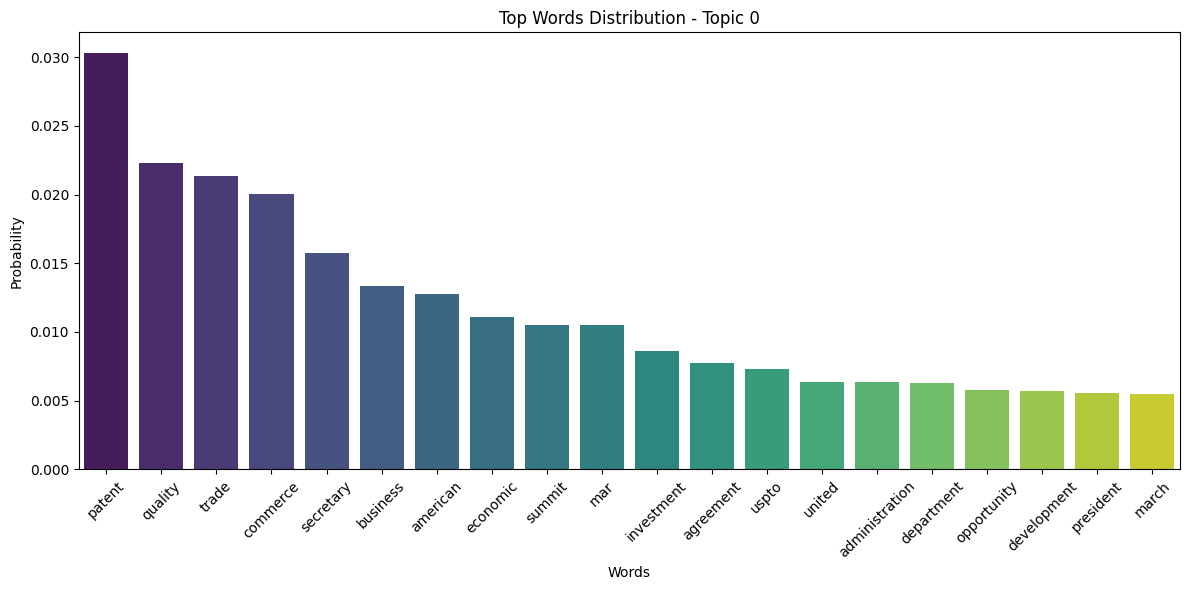

In [16]:
import matplotlib.pyplot as plt # plotting
import seaborn as sns # plotting

# Plotting the distributions
plt.figure(figsize=(12, 6))
sns.barplot(data=df_plot_0, x='Word', y='Probability', palette='viridis')

# Add title and labels
plt.title('Top Words Distribution - Topic 0')
plt.xlabel('Words')
plt.ylabel('Probability')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

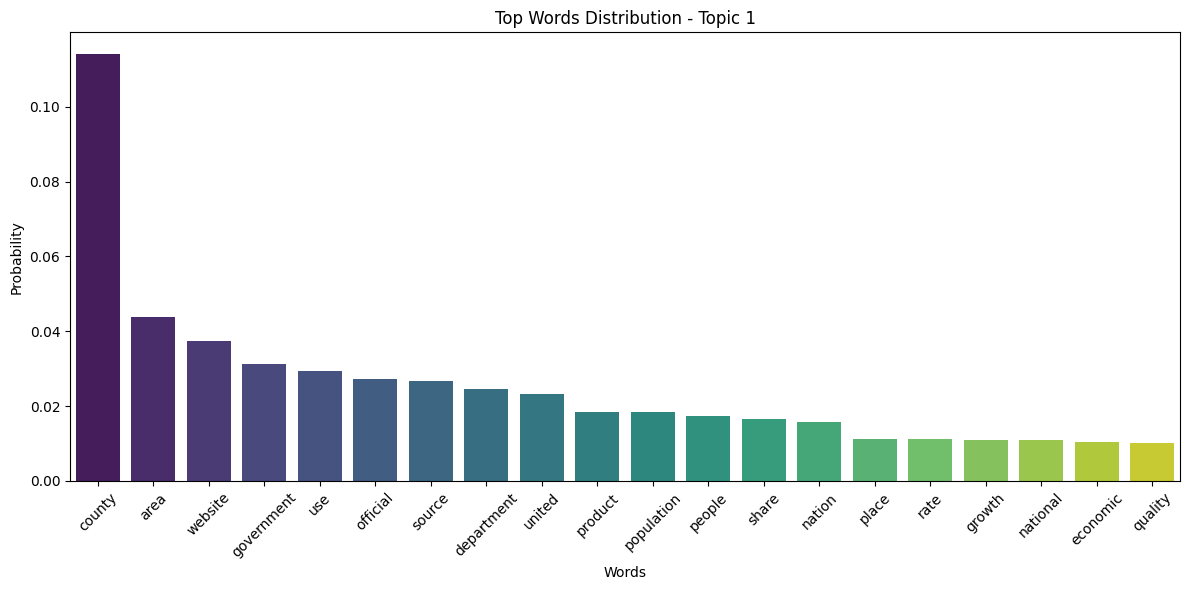

In [17]:
# Plotting the distributions
plt.figure(figsize=(12, 6))
sns.barplot(data=df_plot_1, x='Word', y='Probability', palette='viridis')

# Add title and labels
plt.title('Top Words Distribution - Topic 1')
plt.xlabel('Words')
plt.ylabel('Probability')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

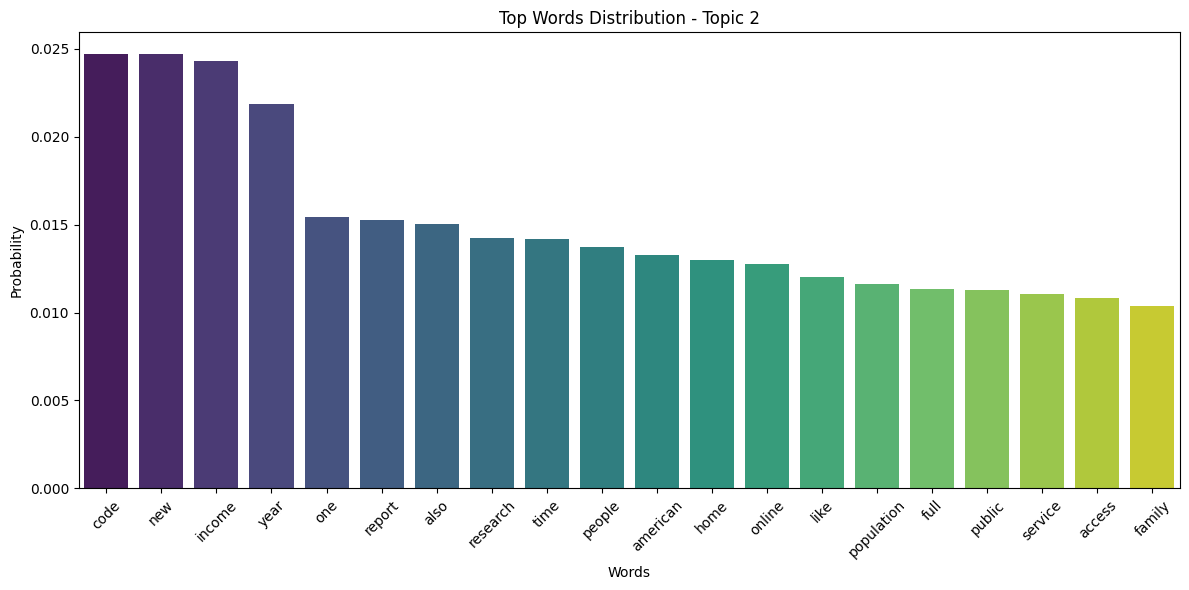

In [18]:
# Plotting the distributions
plt.figure(figsize=(12, 6))
sns.barplot(data=df_plot_2, x='Word', y='Probability', palette='viridis')

# Add title and labels
plt.title('Top Words Distribution - Topic 2')
plt.xlabel('Words')
plt.ylabel('Probability')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
#Probability of each document per topic
cols = ["Topic_" + str(each) for each in range(lda.n_components)]
docs = ["Document_" + str(each) for each in range(X.shape[0])]

df_topics = pd.DataFrame(np.round(doc_topics,2),
                         columns=cols,
                         index=docs)

df_topics

,Topic_0,Topic_1,Topic_2
Document_0,0.00,0.00,1.00
Document_1,0.04,0.12,0.84
Document_2,0.00,0.49,0.51
Document_3,0.17,0.12,0.71
Document_4,0.01,0.01,0.98
...,...,...,...
Document_102,0.00,0.00,0.99
Document_103,0.12,0.12,0.76
Document_104,0.00,0.03,0.97
Document_105,0.40,0.00,0.60


In [20]:
#Assigning each document the topic with the highest probability
imp_topic = np.argmax(df_topics.values, axis=1)
df_topics["top_topic"] = imp_topic
print(df_topics.head(10))

            Topic_0  Topic_1  Topic_2  top_topic
Document_0     0.00     0.00     1.00          2
Document_1     0.04     0.12     0.84          2
Document_2     0.00     0.49     0.51          2
Document_3     0.17     0.12     0.71          2
Document_4     0.01     0.01     0.98          2
Document_5     0.01     0.01     0.98          2
Document_6     0.01     0.01     0.99          2
Document_7     0.00     0.00     0.99          2
Document_8     1.00     0.00     0.00          0
Document_9     1.00     0.00     0.00          0


In [21]:
#Adding topics into original DF
conditions = [df_topics["top_topic"] == 0, df_topics["top_topic"] == 1, df_topics["top_topic"] == 2]

choices = ["Economic and Trade Policies", 
           "Demographics and Government Statistics", 
           "Public Services and Research", 
           ]
final_data.loc[:,"Topic_Name"] = np.select(conditions, choices, default="Other")

final_data

,url,Found Links,Source,content,Topic_Name
0,http://economy.fedprimerate.com/2009/03/,"[http://www.census.gov/const/newressales.pdf, ...",cited,economy march 2009commentlink marginleft6emeco...,Public Services and Research
1,http://li558-193.members.linode.com/index.php?...,[http://www.census.gov/hhes/www/income/data/hi...,repackaged,fixing inequality through tax page 27 politica...,Public Services and Research
2,http://villageoflakeorion.org/index.php/forms-...,[https://www.census.gov/search-results.html?se...,cited,document centerwelcome to village of lake orio...,Public Services and Research
3,http://wcrsfm.org/category/topics/black-lives-...,[http://2020census.gov],cited,black life matter wcrs lp columbus community r...,Public Services and Research
4,http://www.deferredconsumption.com/2012/10/no-...,[http://www.census.gov/prod/2012pubs/p60-243.pdf],cited,deferred consumption no our income dont just f...,Public Services and Research
...,...,...,...,...,...
102,https://www.pubrecord.org/cupertino-property-r...,[https://www.census.gov/programs-surveys/acs],cited,free cupertino property record california prop...,Public Services and Research
103,https://www.sociable.co/business/who-new-benef...,[https://www.census.gov/newsroom/press-release...,cited,who are the new beneficiary of the sharing eco...,Public Services and Research
104,https://www.socialexplorer.com/data/acs2006/me...,[http://www.census.gov/hhes/www/poverty/newgui...,cited,3 or 4 child c17012005 poverty status in the p...,Public Services and Research
105,https://www.tradeready.ca/2019/featured-storie...,[https://www.census.gov/foreign-trade/press-re...,cited,10 global trade trend well be watching in 2020...,Public Services and Research


In [22]:
# Simple count of topics
final_data['Topic_Name'].value_counts()

Topic_Name
Public Services and Research              45
Economic and Trade Policies               32
Demographics and Government Statistics    30
Name: count, dtype: int64

In [24]:
# split data into repackaged and cited instances
final_data_repackaged = final_data[final_data['Source']=='repackaged']
final_data_cited = final_data[final_data['Source']=='cited']
len(final_data_cited)


80

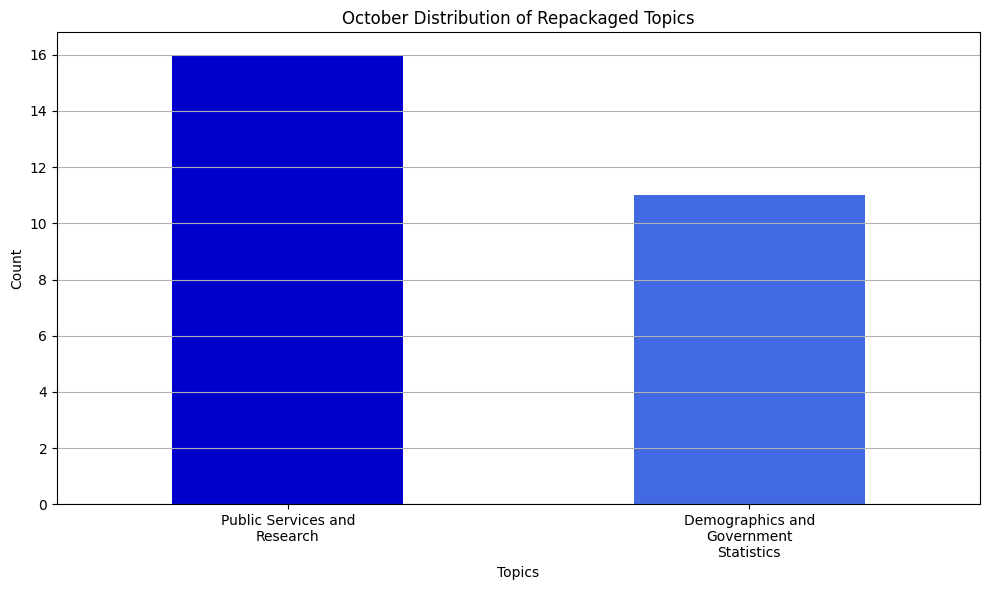

In [25]:
import textwrap # wrap labels

# Get the value counts
topic_counts = final_data_repackaged['Topic_Name'].value_counts()

# Define a list of blue shades
blue_shades = ['#0000CD', '#4169E1', '#1E90FF', '#87CEEB', '#ADD8E6']

# Wrap the x-axis labels
wrapped_labels = [textwrap.fill(label, width=20) for label in topic_counts.index]

# Create a bar chart
plt.figure(figsize=(10, 6))
topic_counts.plot(kind='bar', color=blue_shades[:len(topic_counts)])
plt.title('October Distribution of Repackaged Topics')
plt.xlabel('Topics')
plt.ylabel('Count')
plt.xticks(ticks=range(len(wrapped_labels)), labels=wrapped_labels, rotation=0)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

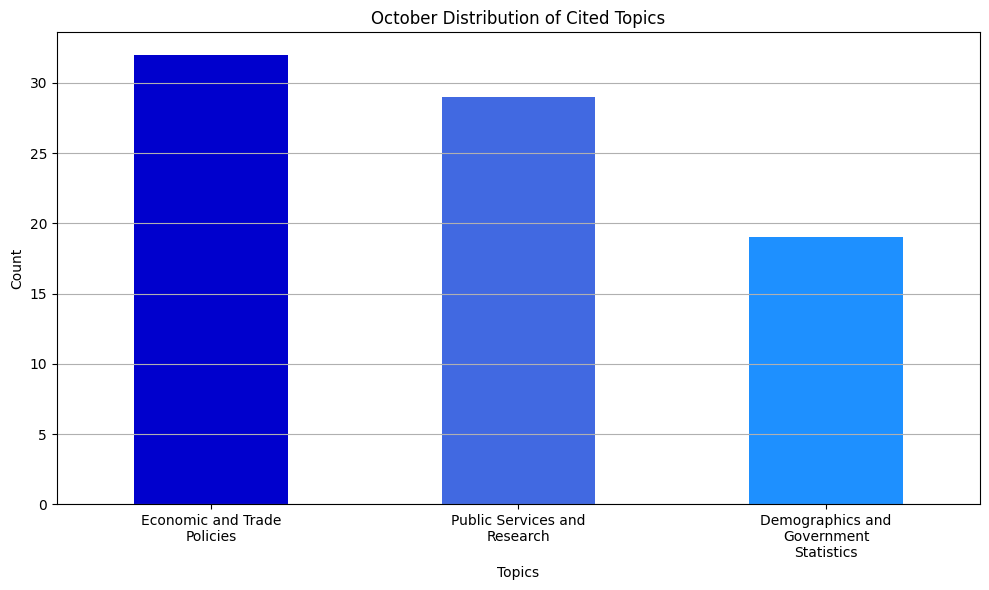

In [26]:
# Get the value counts
topic_counts = final_data_cited['Topic_Name'].value_counts()

# Define a list of blue shades
blue_shades = ['#0000CD', '#4169E1', '#1E90FF', '#87CEEB', '#ADD8E6']

# Wrap the x-axis labels
wrapped_labels = [textwrap.fill(label, width=20) for label in topic_counts.index]

# Create a bar chart
plt.figure(figsize=(10, 6))
topic_counts.plot(kind='bar', color=blue_shades[:len(topic_counts)])
plt.title('October Distribution of Cited Topics')
plt.xlabel('Topics')
plt.ylabel('Count')
plt.xticks(ticks=range(len(wrapped_labels)), labels=wrapped_labels, rotation=0)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

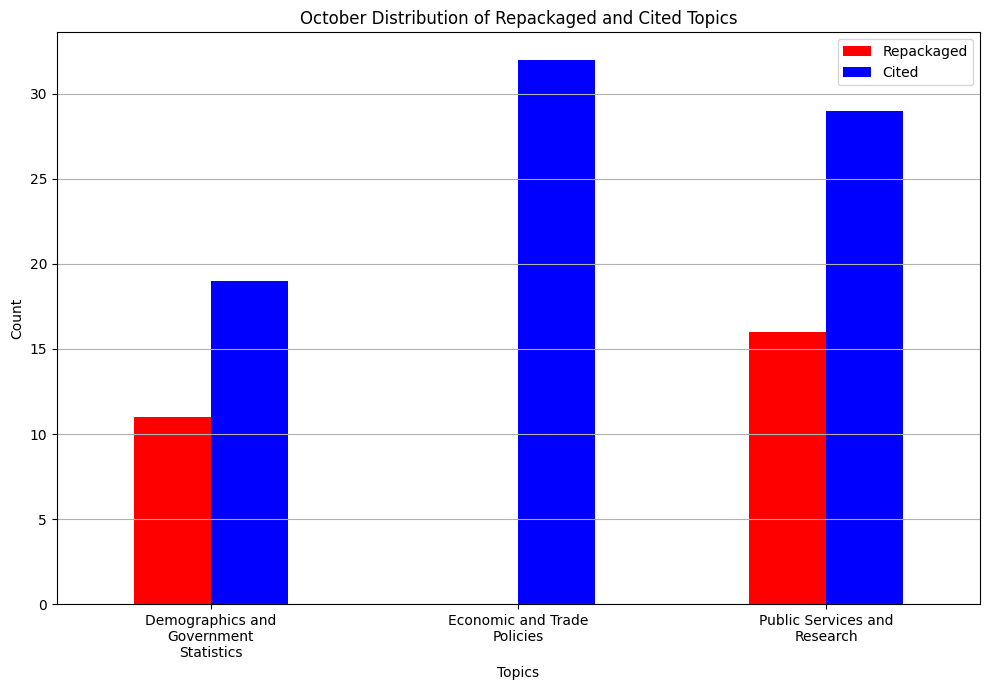

In [28]:
import textwrap # wrap axis label


# Assuming final_data_repackaged and final_data_cited are already defined DataFrames

# Get the value counts for repackaged topics
repackaged_topic_counts = final_data_repackaged['Topic_Name'].value_counts()

# Get the value counts for cited topics
cited_topic_counts = final_data_cited['Topic_Name'].value_counts()

# Combine the two series into a DataFrame
combined_counts = pd.DataFrame({
    'Repackaged': repackaged_topic_counts,
    'Cited': cited_topic_counts
}).fillna(0)

# Define distinct colors for repackaged and cited bars
colors = ['red', 'blue']  # Red for Repackaged, Blue for Cited

# Wrap the x-axis labels
wrapped_labels = [textwrap.fill(label, width=20) for label in combined_counts.index]

# Create a bar chart with grouped bars
fig, ax = plt.subplots(figsize=(10, 7))
combined_counts.plot(kind='bar', color=colors, ax=ax)
ax.set_title('October Distribution of Repackaged and Cited Topics')
ax.set_xlabel('Topics')
ax.set_ylabel('Count')
ax.set_xticks(range(len(wrapped_labels)))
ax.set_xticklabels(wrapped_labels, rotation=0)
ax.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

## Mapping

### Repackaged

In [29]:
# mapping packages
from geopy.geocoders import Nominatim
from tqdm import tqdm
import re
import socket
import time
from ip2geotools.databases.noncommercial import DbIpCity
import idna

# Function to get the details of the IP address including city, country, coordinates, etc.
def get_details(ip):
    res = DbIpCity.get(ip, api_key="free")
    return {
        "IP Address": res.ip_address,
        "City": res.city,
        "Region": res.region,
        "Country": res.country,
        "latitude": res.latitude, # we will get errors for latitude and longitude; this is resolved in the next step
        "longitude": res.longitude
    }

# Function to process a list of URLs and save the results into a DataFrame
def process_urls(urls):
    data = []
    for url in urls:
        try:
            domain = url.split('//')[-1].split('/')[0]
            ip_add = socket.gethostbyname(domain)
            details = get_details(ip_add)
            details["URL"] = url
            data.append(details)
            time.sleep(1)  # Add delay to prevent rate limiting
        except socket.gaierror:
            print(f"Could not resolve {url}: DNS resolution failed")
        except idna.core.IDNAError as e:
            print(f"Could not process {url}: {e}")
        except Exception as e:
            print(f"Could not process {url}: {e}")

    df = pd.DataFrame(data)
    return df

# List of URLs to process
urls_repackaged = final_data_repackaged['url']
urls_repackaged = list(set(urls_repackaged)) # remove duplicate urls

# Process each URL and save the results into a DataFrame
map_df_repackaged = process_urls(urls_repackaged)
print(map_df_repackaged)

Status code 403 from https://nominatim.openstreetmap.org/search: ERROR - 403 Client Error: Forbidden for url: https://nominatim.openstreetmap.org/search?q=Ashburn%2C+Virginia+US&format=jsonv2&addressdetails=1&limit=1
Status code 403 from https://nominatim.openstreetmap.org/search: ERROR - 403 Client Error: Forbidden for url: https://nominatim.openstreetmap.org/search?q=Ashburn%2C+US&format=jsonv2&addressdetails=1&limit=1
Status code 403 from https://nominatim.openstreetmap.org/search: ERROR - 403 Client Error: Forbidden for url: https://nominatim.openstreetmap.org/search?q=Toronto%2C+Ontario+CA&format=jsonv2&addressdetails=1&limit=1
Status code 403 from https://nominatim.openstreetmap.org/search: ERROR - 403 Client Error: Forbidden for url: https://nominatim.openstreetmap.org/search?q=Toronto%2C+CA&format=jsonv2&addressdetails=1&limit=1
Status code 403 from https://nominatim.openstreetmap.org/search: ERROR - 403 Client Error: Forbidden for url: https://nominatim.openstreetmap.org/searc

         IP Address                       City        Region Country latitude  \
0    108.139.15.113                    Ashburn      Virginia      US     None   
1      104.21.17.22                    Toronto       Ontario      CA     None   
2   151.101.194.159              San Francisco    California      US     None   
3    172.67.219.148                    Toronto       Ontario      CA     None   
4     151.101.16.95                    Atlanta       Georgia      US     None   
5     198.74.61.193     Hanover (Cedar Knolls)    New Jersey      US     None   
6     34.194.39.199                    Ashburn      Virginia      US     None   
7     104.21.71.236                    Toronto       Ontario      CA     None   
8       76.76.21.21       Walnut (Valle Lindo)    California      US     None   
9    206.223.139.13                 Harrisburg  Pennsylvania      US     None   
10    23.223.139.17             Lithia Springs       Georgia      US     None   
11     34.117.28.18         

In [31]:
map_df_repackaged['City'] = map_df_repackaged['City'].apply(lambda x: re.sub(r'\(.*?\)', '', x).strip()) # removing data in parenthesis for city so we can get lat and long

# Initialize the geolocator
geolocator = Nominatim(user_agent="capstone_data_pull2")

# Function to get latitude and longitude
def get_lat_long(city, region, country):
    location = geolocator.geocode(f"{city}, {region}, {country}", timeout=10)
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

for index, row in tqdm(map_df_repackaged.iterrows(), total=map_df_repackaged.shape[0]):
    latitude, longitude = get_lat_long(row['City'], row['Region'], row['Country'])
    map_df_repackaged.at[index, 'latitude'] = latitude
    map_df_repackaged.at[index, 'longitude'] = longitude

100%|██████████| 27/27 [00:21<00:00,  1.28it/s]


In [32]:
# Renaming the column
map_df_repackaged.rename(columns={'URL': 'url'}, inplace=True)

# Merge the DataFrames on the 'URL' column
map_df_repackaged_merged = pd.merge(map_df_repackaged, final_data_repackaged, on='url', how='inner')
map_df_repackaged_merged

,IP Address,City,Region,Country,latitude,longitude,url,Found Links,Source,content,Topic_Name
0,108.139.15.113,Ashburn,Virginia,US,39.043719,-77.48749,https://catalog.data.gov/dataset/tiger-line-sh...,"[/organization/census-gov, /organization/about...",repackaged,tigerline shapefile 2020 county delta county c...,Demographics and Government Statistics
1,104.21.17.22,Toronto,Ontario,CA,43.653482,-79.383935,https://www.california-demographics.com/95003-...,[https://data.census.gov/all?y=2017&d=acs%205-...,repackaged,95003 demographic current california census da...,Public Services and Research
2,151.101.194.159,San Francisco,California,US,37.779259,-122.419329,https://www.medfieldpubliclibrary.org/databases/,[http://www.census.gov/data/data-tools.html],repackaged,database medfield public librarythe library wi...,Public Services and Research
3,172.67.219.148,Toronto,Ontario,CA,43.653482,-79.383935,https://www.california-demographics.com/94549-...,[https://data.census.gov/all?y=2017&d=acs%205-...,repackaged,94549 demographic current california census da...,Public Services and Research
4,151.101.16.95,Atlanta,Georgia,US,33.748992,-84.390264,https://www.nature.com/articles/s41893-020-006...,[https://www.census.gov/programs-surveys/acs/d...,repackaged,impact of transportation network company on ur...,Public Services and Research
5,198.74.61.193,Hanover,New Jersey,US,40.817422,-74.395406,http://li558-193.members.linode.com/index.php?...,[http://www.census.gov/hhes/www/income/data/hi...,repackaged,fixing inequality through tax page 27 politica...,Public Services and Research
6,34.194.39.199,Ashburn,Virginia,US,39.043719,-77.48749,https://libguides.stthomas.edu/stcm344/demogra...,"[https://data.census.gov/, http://www.census.g...",repackaged,demographic data stcm 344 writing for strategi...,Public Services and Research
7,104.21.71.236,Toronto,Ontario,CA,43.653482,-79.383935,https://migranttales.net/race-files-why-racist...,[http://quickfacts.census.gov/qfd/states/00000...,repackaged,race file why racist is such a powerful word m...,Public Services and Research
8,76.76.21.21,Walnut,California,US,34.020289,-117.865339,https://worldpopulationreview.com/us-counties/...,[https://www.census.gov/data/datasets/time-ser...,repackaged,newton county indiana population 2024world pop...,Demographics and Government Statistics
9,206.223.139.13,Harrisburg,Pennsylvania,US,40.266311,-76.886112,https://www.adamscountypa.gov/departments/comm...,"[https://data.census.gov/profile/adams_county,...",repackaged,adam county pa adam county annual salary board...,Demographics and Government Statistics


In [36]:
#Mapping data
import plotly.graph_objects as go

# Define a color map for the topics
color_map = {
    'Economic and Trade Policies': 'blue',
    'Demographics and Government statistics': 'purple',
    'Public Services and Research': 'pink',
    'Other': 'gray'
}

# Map the Topic_Name to colors
map_df_repackaged_merged['color'] = map_df_repackaged_merged['Topic_Name'].map(color_map)

# Create the scatter geo plot
fig = go.Figure(data=go.Scattergeo(
    lon=map_df_repackaged_merged['longitude'],
    lat=map_df_repackaged_merged['latitude'],
    mode='markers',
    text=map_df_repackaged_merged['url'],
    hoverinfo='text',
    marker=dict(color=map_df_repackaged_merged['color'], size=10, line=dict(width=1, color='black')),
    showlegend=False
))

# Update the layout to include a legend
fig.update_layout(
    title='October Instances of Repackaged Census Data',
    geo_scope='north america',
    legend_title_text='Topics',
    legend=dict(
        itemsizing='constant'
    )
)

# Add legend items manually
for topic, color in color_map.items():
    fig.add_trace(go.Scattergeo(
        lon=[None], lat=[None],
        mode='markers',
        marker=dict(size=10, color=color),
        name=topic
    ))

# Show the plot
fig.show()

### Cited

In [37]:
# Function to get the details of the IP address including city, country, coordinates, etc.
def get_details(ip):
    res = DbIpCity.get(ip, api_key="free")
    return {
        "IP Address": res.ip_address,
        "City": res.city,
        "Region": res.region,
        "Country": res.country,
        "latitude": res.latitude, # we will get errors for latitude and longitude; this is resolved in the next step
        "longitude": res.longitude
    }

# Function to process a list of URLs and save the results into a DataFrame
def process_urls(urls):
    data = []
    for url in urls:
        try:
            domain = url.split('//')[-1].split('/')[0]
            ip_add = socket.gethostbyname(domain)
            details = get_details(ip_add)
            details["URL"] = url
            data.append(details)
            time.sleep(1)  # Add delay to prevent rate limiting
        except socket.gaierror:
            print(f"Could not resolve {url}: DNS resolution failed")
        except idna.core.IDNAError as e:
            print(f"Could not process {url}: {e}")
        except Exception as e:
            print(f"Could not process {url}: {e}")

    df = pd.DataFrame(data)
    return df

# List of URLs to process
urls_cited = final_data_cited['url']
urls_cited = list(set(urls_cited)) # remove duplicate urls

# Process each URL and save the results into a DataFrame
map_df_cited = process_urls(urls_cited)
print(map_df_cited)

Status code 403 from https://nominatim.openstreetmap.org/search: ERROR - 403 Client Error: Forbidden for url: https://nominatim.openstreetmap.org/search?q=Toronto%2C+Ontario+CA&format=jsonv2&addressdetails=1&limit=1
Status code 403 from https://nominatim.openstreetmap.org/search: ERROR - 403 Client Error: Forbidden for url: https://nominatim.openstreetmap.org/search?q=Toronto%2C+CA&format=jsonv2&addressdetails=1&limit=1
Status code 403 from https://nominatim.openstreetmap.org/search: ERROR - 403 Client Error: Forbidden for url: https://nominatim.openstreetmap.org/search?q=Washington+D.C.+%28Northwest+Washington%29%2C+District+of+Columbia+US&format=jsonv2&addressdetails=1&limit=1
Status code 403 from https://nominatim.openstreetmap.org/search: ERROR - 403 Client Error: Forbidden for url: https://nominatim.openstreetmap.org/search?q=Washington+D.C.+%28Northwest+Washington%29%2C+US&format=jsonv2&addressdetails=1&limit=1
Status code 403 from https://nominatim.openstreetmap.org/search: ERRO

         IP Address                                    City  \
0      172.65.90.24                                 Toronto   
1   170.110.225.196  Washington D.C. (Northwest Washington)   
2   170.110.225.196  Washington D.C. (Northwest Washington)   
3      3.161.136.54                                 Atlanta   
4      172.65.90.27                                 Toronto   
..              ...                                     ...   
75    104.18.105.25                                 Toronto   
76     172.65.90.25                                 Toronto   
77     172.65.90.27                                 Toronto   
78    172.67.207.58                                 Toronto   
79   207.38.102.103                             Los Angeles   

                  Region Country latitude longitude  \
0                Ontario      CA     None      None   
1   District of Columbia      US     None      None   
2   District of Columbia      US     None      None   
3                Georgi

In [38]:
# resolve lat/long errors

map_df_cited['City'] = map_df_cited['City'].apply(lambda x: re.sub(r'\(.*?\)', '', x).strip()) # removing data in parenthesis for city so we can get lat and long

# Initialize the geolocator
geolocator = Nominatim(user_agent="capstone_data_pull3")

# Function to get latitude and longitude
def get_lat_long(city, region, country):
    location = geolocator.geocode(f"{city}, {region}, {country}", timeout=10)
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

for index, row in tqdm(map_df_cited.iterrows(), total=map_df_cited.shape[0]):
    latitude, longitude = get_lat_long(row['City'], row['Region'], row['Country'])
    map_df_cited.at[index, 'latitude'] = latitude
    map_df_cited.at[index, 'longitude'] = longitude

100%|██████████| 80/80 [01:11<00:00,  1.12it/s]


In [39]:
# Renaming the column
map_df_cited.rename(columns={'URL': 'url'}, inplace=True)

# Merge the DataFrames on the 'URL' column
map_df_cited_merged = pd.merge(map_df_cited, final_data_cited, on='url', how='inner')
map_df_cited_merged

,IP Address,City,Region,Country,latitude,longitude,url,Found Links,Source,content,Topic_Name
0,172.65.90.24,Toronto,Ontario,CA,43.653482,-79.383935,https://2017-2021.commerce.gov/index.php/image...,[https://www.census.gov/guidance],cited,u department of commerceskip to main contentth...,Demographics and Government Statistics
1,170.110.225.196,Washington D.C.,District of Columbia,US,38.895037,-77.036543,https://mbda.commerce.gov/sslink/os/cfbci/news...,[http://www.census.gov/],cited,department of commercethis is an archived site...,Economic and Trade Policies
2,170.110.225.196,Washington D.C.,District of Columbia,US,38.895037,-77.036543,https://mbda.commerce.gov/sslink/os/cfbci/news...,[http://www.census.gov/],cited,department of commercethis is an archived site...,Economic and Trade Policies
3,3.161.136.54,Atlanta,Georgia,US,33.748992,-84.390264,https://www.kenw.org/npr-news/2024-09-13/clima...,[https://www.census.gov/library/stories/state-...,cited,climate change make farming easier in alaska i...,Public Services and Research
4,172.65.90.27,Toronto,Ontario,CA,43.653482,-79.383935,https://2017-2021.commerce.gov/index.php/image...,[https://www.census.gov/guidance],cited,u department of commerceskip to main contentth...,Demographics and Government Statistics
...,...,...,...,...,...,...,...,...,...,...,...
75,104.18.105.25,Toronto,Ontario,CA,43.653482,-79.383935,http://www.eagentsdemo.com/property-detail-qui...,[/customredirect.aspx?url=http%3a%2f%2ffactfin...,cited,dream home finder eagents demo sitebaynet tech...,Public Services and Research
76,172.65.90.25,Toronto,Ontario,CA,43.653482,-79.383935,https://2017-2021.commerce.gov/index.php/image...,[https://www.census.gov/guidance],cited,u department of commerceskip to main contentth...,Demographics and Government Statistics
77,172.65.90.27,Toronto,Ontario,CA,43.653482,-79.383935,https://2017-2021.commerce.gov/index.php/image...,[https://www.census.gov/guidance],cited,u department of commerceskip to main contentth...,Demographics and Government Statistics
78,172.67.207.58,Toronto,Ontario,CA,43.653482,-79.383935,https://www.sociable.co/business/who-new-benef...,[https://www.census.gov/newsroom/press-release...,cited,who are the new beneficiary of the sharing eco...,Public Services and Research


In [40]:
# Define a color map for the topics
color_map = {
    'Economic and Trade Policies': 'blue',
    'Demographics and Government statistics': 'purple',
    'Public Services and Research': 'pink',
    'Other': 'gray'
}

# Map the Topic_Name to colors
map_df_cited_merged['color'] = map_df_cited_merged['Topic_Name'].map(color_map)

# Create the scatter geo plot
fig = go.Figure(data=go.Scattergeo(
    lon=map_df_cited_merged['longitude'],
    lat=map_df_cited_merged['latitude'],
    mode='markers',
    text=map_df_cited_merged['url'],
    hoverinfo='text',
    marker=dict(color=map_df_cited_merged['color'], size=10, line=dict(width=1, color='black')),
    showlegend=False
))

# Update the layout to include a legend
fig.update_layout(
    title='October Instances of Cited Census Data',
    geo_scope='north america',
    legend_title_text='Topics',
    legend=dict(
        itemsizing='constant'
    )
)

# Add legend items manually
for topic, color in color_map.items():
    fig.add_trace(go.Scattergeo(
        lon=[None], lat=[None],
        mode='markers',
        marker=dict(size=10, color=color),
        name=topic
    ))

# Show the plot
fig.show()

## Seed Link Analysis

In [41]:
r_url = final_data_repackaged['url'].tolist()
c_url = final_data_cited['url'].tolist()

Repackaged

In [42]:
# Parsing links and creating a dataframe
from urllib.parse import urlparse # parse out urls

seed_parsed_url = []

for url in r_url:
    seed_parsed = urlparse(url)
    seed_parsed_url.append({
        "URL": url,
        "Scheme": seed_parsed.scheme,
        "Netloc": seed_parsed.netloc,
        "Path": seed_parsed.path,
        "Query": seed_parsed.query
    })

# Convert the list of dictionaries to a DataFrame
r_seed_parsed_links = pd.DataFrame(seed_parsed_url)

In [43]:
# Filter out any row in paths that has NA or only a / in it 
r_seed_parsed_links = r_seed_parsed_links.replace('', pd.NA).dropna(subset=['Path'])
r_seed_parsed_links = r_seed_parsed_links[r_seed_parsed_links['Path'] != '/']

print(r_seed_parsed_links)

                                                  URL Scheme  \
0   http://li558-193.members.linode.com/index.php?...   http   
1   https://catalog.data.gov/dataset/tiger-line-sh...  https   
2   https://catalog.data.gov/dataset/tiger-line-sh...  https   
3   https://catalog.data.gov/dataset/tiger-line-sh...  https   
4   https://catalog.data.gov/dataset/tiger-line-sh...  https   
5   https://fred.stlouisfed.org/series/pua0t17mn27...  https   
6   https://fun107.com/a-most-unusual-non-toxic-fl...  https   
7   https://guides.mclibrary.duke.edu/healthstatis...  https   
8   https://hopewelltwp.com/documents/ordinance-o1...  https   
9   https://hopewelltwp.com/documents/resolution-r...  https   
10  https://libguides.stthomas.edu/stcm344/demogra...  https   
11  https://migranttales.net/race-files-why-racist...  https   
12  https://web.oceansidechamber.com/events/north-...  https   
13  https://worldpopulationreview.com/us-counties/...  https   
14  https://worldpopulationreview.com/us

In [44]:
netloc_distribution = r_seed_parsed_links['Netloc'].value_counts()
print("Netloc distribution:")
print(netloc_distribution)

Netloc distribution:
Netloc
worldpopulationreview.com          4
catalog.data.gov                   4
www.california-demographics.com    3
hopewelltwp.com                    2
www.adamscountypa.gov              1
www.nature.com                     1
www.medfieldpubliclibrary.org      1
www.harriscountyga.gov             1
www.connetquotlibrary.org          1
www.breitbart.com                  1
li558-193.members.linode.com       1
web.oceansidechamber.com           1
migranttales.net                   1
libguides.stthomas.edu             1
guides.mclibrary.duke.edu          1
fun107.com                         1
fred.stlouisfed.org                1
www.nbcchicago.com                 1
Name: count, dtype: int64


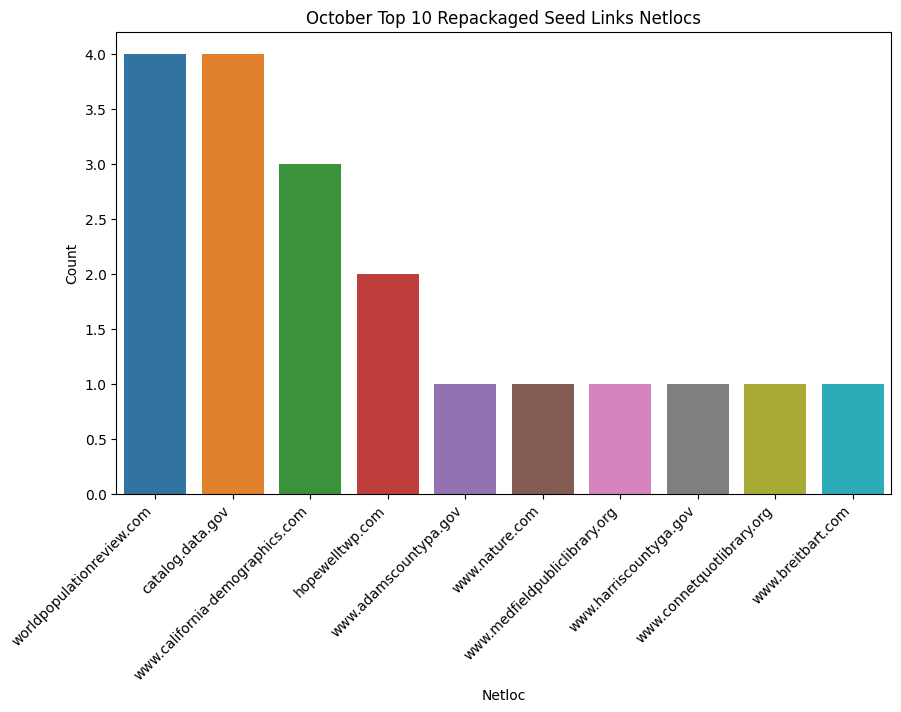

In [45]:
# Plot netloc distribution (top 10)
plt.figure(figsize=(10, 6))
top_netlocs = r_seed_parsed_links['Netloc'].value_counts().nlargest(10)
sns.barplot(x=top_netlocs.index, y=top_netlocs.values)
plt.title('October Top 10 Repackaged Seed Links Netlocs')
plt.xlabel('Netloc')
plt.ylabel('Count')
plt.xticks(rotation=45, ha = 'right')
plt.show()

Cited

In [46]:
# Parsing links and creating a dataframe
from urllib.parse import urlparse # parse out urls

c_seed_parsed_url = []

for url in c_url:
    c_seed_parsed = urlparse(url)
    c_seed_parsed_url.append({
        "URL": url,
        "Scheme": c_seed_parsed.scheme,
        "Netloc": c_seed_parsed.netloc,
        "Path": c_seed_parsed.path,
        "Query": c_seed_parsed.query
    })

# Convert the list of dictionaries to a DataFrame
c_seed_parsed_links = pd.DataFrame(c_seed_parsed_url)

In [47]:
# Filter out any row in paths that has NA or only a / in it 
c_seed_parsed_links = c_seed_parsed_links.replace('', pd.NA).dropna(subset=['Path'])
c_seed_parsed_links = c_seed_parsed_links[c_seed_parsed_links['Path'] != '/']

print(c_seed_parsed_links)

                                                  URL Scheme  \
0            http://economy.fedprimerate.com/2009/03/   http   
1   http://villageoflakeorion.org/index.php/forms-...   http   
2   http://wcrsfm.org/category/topics/black-lives-...   http   
3   http://www.deferredconsumption.com/2012/10/no-...   http   
4   http://www.eagentsdemo.com/property-detail-qui...   http   
..                                                ...    ...   
75  https://www.pubrecord.org/cupertino-property-r...  https   
76  https://www.sociable.co/business/who-new-benef...  https   
77  https://www.socialexplorer.com/data/acs2006/me...  https   
78  https://www.tradeready.ca/2019/featured-storie...  https   
79  https://www.upworthy.com/ai-artist-creates-por...  https   

                         Netloc  \
0      economy.fedprimerate.com   
1        villageoflakeorion.org   
2                    wcrsfm.org   
3   www.deferredconsumption.com   
4           www.eagentsdemo.com   
..                   

In [48]:
netloc_distribution = c_seed_parsed_links['Netloc'].value_counts()
print("Netloc distribution:")
print(netloc_distribution)

Netloc distribution:
Netloc
mbda.commerce.gov                        27
2017-2021.commerce.gov                   15
2010-2014.commerce.gov                    3
www.pubrecord.org                         2
2001-2009.commerce.gov                    2
fred.stlouisfed.org                       2
cityofwestmiami.gov                       2
www.tradeready.ca                         1
www.capitalspectator.com                  1
utilitieslocal.com                        1
www.americanprogressaction.org            1
www.asbmb.org                             1
www.kenw.org                              1
www.choicesmagazine.org                   1
www.socialexplorer.com                    1
projects.propublica.org                   1
www.middleclasspoliticaleconomist.com     1
www.sociable.co                           1
statisticalatlas.com                      1
economy.fedprimerate.com                  1
pophealth.ucsf.edu                        1
metatalk.metafilter.com                   1
vill

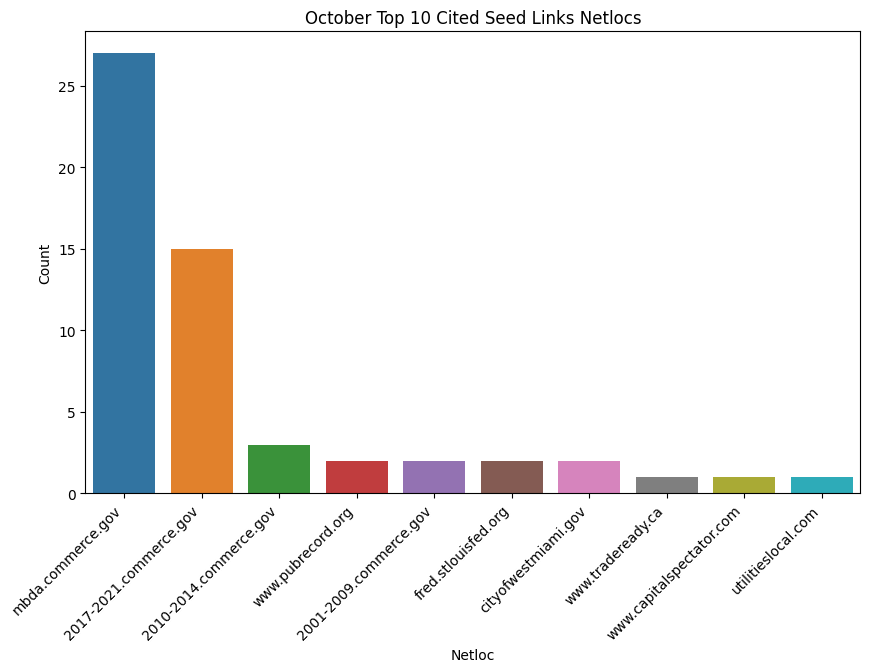

In [49]:
# Plot netloc distribution (top 10)
plt.figure(figsize=(10, 6))
top_netlocs = c_seed_parsed_links['Netloc'].value_counts().nlargest(10)
sns.barplot(x=top_netlocs.index, y=top_netlocs.values)
plt.title('October Top 10 Cited Seed Links Netlocs')
plt.xlabel('Netloc')
plt.ylabel('Count')
plt.xticks(rotation=45, ha = 'right')
plt.show()

## USCB Link Parsing

In [50]:
from urllib.parse import urlparse # parse out urls

#Saving Found Links into a list for later analysis
urls = foundlinks['Found Links'].tolist()

# Filter out URLs that are just 'census.gov' or 'census.gov/'
filtered_urls = [
    url for url in urls 
    if not (urlparse(url).netloc == 'www.census.gov' and (urlparse(url).path == '' or urlparse(url).path == '/'))
]

len(filtered_urls)

141

In [51]:
#Identify patterns for repackaged links
data_tables_patterns = ['table', 'dataset', 'data', 'productview']
repackaged_data_tables_urls = [url for url in filtered_urls if any(pattern in url for pattern in data_tables_patterns)]
cited_data_tables_urls = [url for url in filtered_urls if not any(pattern in url for pattern in data_tables_patterns)]

In [52]:
#Grabbing number of links
len(repackaged_data_tables_urls)

36

In [53]:
#Grabbing number of links
len(cited_data_tables_urls)

105

### Repackaged

In [54]:
# Parsing links and creating a dataframe

r_parsed = []

for url in repackaged_data_tables_urls:
    parsed_url = urlparse(url)
    r_parsed.append({
        "URL": url,
        "Scheme": parsed_url.scheme,
        "Netloc": parsed_url.netloc,
        "Path": parsed_url.path,
        "Query": parsed_url.query
    })

# Convert the list of dictionaries to a DataFrame
r_parsed_links = pd.DataFrame(r_parsed)

In [55]:
# Filter out any row in paths that has NA or only a / in it 
r_parsed_links = r_parsed_links.replace('', pd.NA).dropna(subset=['Path'])
r_parsed_links = r_parsed_links[r_parsed_links['Path'] != '/']

print(r_parsed_links)

                                                  URL Scheme  \
0                     https://data.census.gov/cedsci/  https   
1   https://www.census.gov/quickfacts/fact/table/s...  https   
2   https://meta.geo.census.gov/data/existing/dece...  https   
3          http://www.census.gov/data/data-tools.html   http   
4          http://www.census.gov/data/data-tools.html   http   
5          http://www.census.gov/data/data-tools.html   http   
6   https://www.census.gov/programs-surveys/acs/da...  https   
7   https://www.census.gov/quickfacts/fact/table/h...  https   
8   https://www.census.gov/quickfacts/fact/table/h...  https   
9   http://www.census.gov/hhes/www/income/data/his...   http   
10  https://www.census.gov/data/tables/2000/demo/p...  https   
11  https://data.census.gov/table/acsst5y2022.s010...  https   
12  https://data.census.gov/profile/adams_county,_...  https   
13  https://www.census.gov/data/datasets/time-seri...  https   
14                    https://data.censu

In [56]:
# Count the number of URLs
url_count = r_parsed_links['URL'].count()
print(f"Total number of URLs: {url_count}")

# Count the number of unique schemes
unique_schemes = r_parsed_links['Scheme'].nunique()
print(f"Number of unique schemes: {unique_schemes}")

# Count the number of unique netlocs
unique_netlocs = r_parsed_links['Netloc'].nunique()
print(f"Number of unique netlocs: {unique_netlocs}")

# Count the number of unique Paths
unique_paths = r_parsed_links['Path'].nunique()
print(f"Number of unique Paths: {unique_paths}")

Total number of URLs: 35
Number of unique schemes: 2
Number of unique netlocs: 3
Number of unique Paths: 19


In [57]:
# Extracting additional insights
from collections import Counter

# 1. Identify the most common URL paths
r_paths = r_parsed_links['Path']
r_path_counts = Counter(r_paths)
r_most_common_paths = r_path_counts.most_common(15)

print("\nMost common Repackaged URL paths:")
for path, count in r_most_common_paths:
    print(f"{path}: {count}")


Most common Repackaged URL paths:
/data/datasets/time-series/demo/popest/2020s-counties-total.html: 6
/all: 5
/data/data-tools.html: 3
/population/www/censusdata/pop1790-1990.html: 3
/cedsci/: 2
/quickfacts/fact/table/harriscountygeorgia/pst045221: 2
/data/existing/decennial/geo/gpmb/tigerline/archived_19110/tl_2020_faces.shp.ea.iso.xml: 2
/quickfacts/fact/table/suffolkcountynewyork/hcn010212: 1
/data/existing/decennial/geo/gpmb/tigerline/archived_19110/tl_2022_facesah.dbf.ea.iso.xml: 1
/programs-surveys/acs/data.html: 1
/hhes/www/income/data/historical/families/2012/f06ar_2012.xls: 1
/data/tables/2000/demo/popproj.html: 1
/table/acsst5y2022.s0101: 1
/profile/adams_county,_pennsylvania: 1
/data/datasets/time-series/demo/saipe/model-tables.html: 1


In [58]:
tables, counts = zip(*r_most_common_paths)
# Create a DataFrame from the tables and counts
data = {'Census Table': tables, 'Number of References': counts}
df = pd.DataFrame(data)

# Create an interactive horizontal bar chart
fig = px.bar(df, 
             x='Number of References', 
             y='Census Table', 
             orientation='h',  # Horizontal bars
             title="Top 15 Most Referenced U.S. Census Paths in Repackaged Instances",
             labels={'Number of References': 'Number of References', 'Census Table': 'Census Table'},
             color='Number of References',  # Color bars based on count
             text='Number of References')  # Show count on hover

# Customize the hover data (you can modify this to include more details)
fig.update_traces(texttemplate='%{text}', textposition='outside')

# Invert the y-axis to show the highest count at the top
fig.update_yaxes(categoryorder='total descending')

# Show the interactive plot
fig.show()

In [59]:
netloc_distribution = r_parsed_links['Netloc'].value_counts()
print("Netloc distribution:")
print(netloc_distribution)

Netloc distribution:
Netloc
www.census.gov         20
data.census.gov        11
meta.geo.census.gov     4
Name: count, dtype: int64


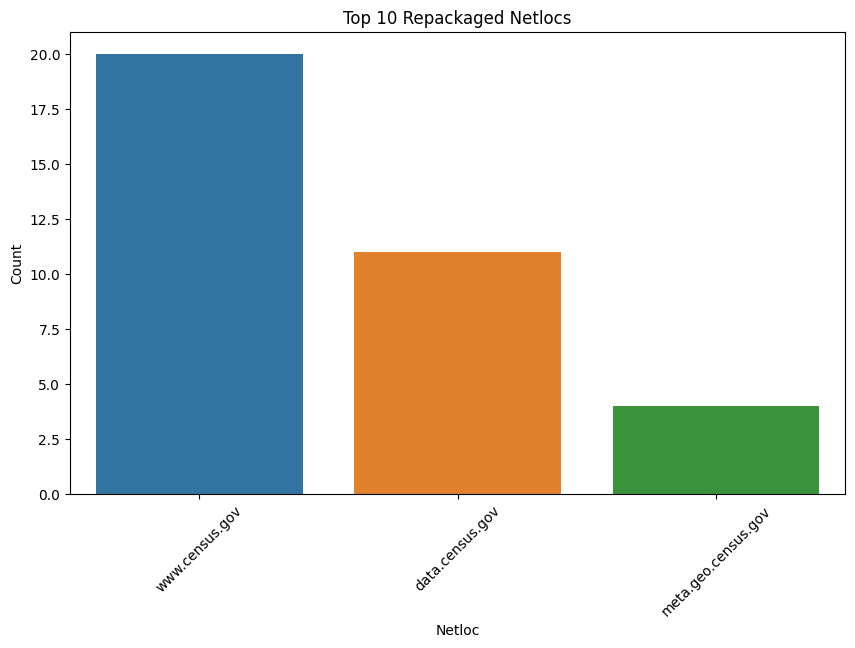

In [60]:
# Plot netloc distribution (top 10)
plt.figure(figsize=(10, 6))
top_netlocs = r_parsed_links['Netloc'].value_counts().nlargest(10)
sns.barplot(x=top_netlocs.index, y=top_netlocs.values)
plt.title('Top 10 Repackaged Netlocs')
plt.xlabel('Netloc')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [61]:
r_query = r_parsed_links.replace('', pd.NA).dropna(subset=['Query'])
print(r_query)

                                                  URL Scheme           Netloc  \
11  https://data.census.gov/table/acsst5y2022.s010...  https  data.census.gov   
12  https://data.census.gov/profile/adams_county,_...  https  data.census.gov   
18  https://data.census.gov/all?y=2017&d=acs%205-y...  https  data.census.gov   
19  https://data.census.gov/all?y=2022&d=acs%205-y...  https  data.census.gov   
20  https://data.census.gov/all?y=2017&d=acs%205-y...  https  data.census.gov   
21  https://data.census.gov/all?y=2022&d=acs%205-y...  https  data.census.gov   
26  https://data.census.gov/table?q=b19001:%20hous...  https  data.census.gov   
34  https://data.census.gov/table/decennialpl2020....  https  data.census.gov   
35  https://data.census.gov/all?y=2022&d=acs%205-y...  https  data.census.gov   

                                   Path  \
11             /table/acsst5y2022.s0101   
12  /profile/adams_county,_pennsylvania   
18                                 /all   
19               

Repackaged Query parameters distribution:
Query_Params
2    8
1    1
Name: count, dtype: int64


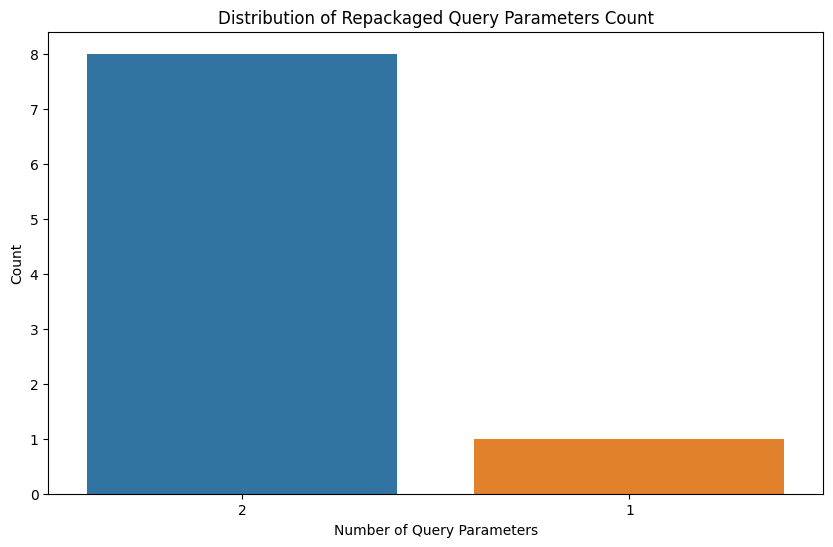

In [62]:
# Extract and count unique query parameters
r_query['Query_Params'] = r_query['Query'].apply(lambda x: len(x.split('&')) if x else 0)
query_params_distribution = r_query['Query_Params'].value_counts()
print("Repackaged Query parameters distribution:")
print(query_params_distribution)

# Plot query parameters distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=r_query, x='Query_Params', order=r_query['Query_Params'].value_counts().index)
plt.title('Distribution of Repackaged Query Parameters Count')
plt.xlabel('Number of Query Parameters')
plt.ylabel('Count')
plt.show()

In [63]:
# Extracting additional insights
from collections import Counter

# 1. Identify the most common URL paths
r_query = r_query['Query']
r_query_counts = Counter(r_query)
r_most_common_query = r_query_counts.most_common(15)

print("\nMost common Repackaged URL paths:")
for path, count in r_most_common_query:
    print(f"{path}: {count}")


Most common Repackaged URL paths:
y=2022&d=acs%205-year%20estimates%20detailed%20tables: 3
y=2017&d=acs%205-year%20estimates%20detailed%20tables: 2
q=zcta5%2017506&g=040xx00us42$8600000: 1
g=050xx00us42001: 1
q=b19001:%20household%20income%20in%20the%20past%2012%20months%20(in%202022%20inflation-adjusted%20dollars)&g=010xx00us,%240400000: 1
y=2020&d=dec%20redistricting%20data%20(pl%2094-171): 1


In [64]:
tables, counts = zip(*r_most_common_query)
# Create a DataFrame from the tables and counts
data = {'Census Table': tables, 'Number of References': counts}
df = pd.DataFrame(data)

# Create an interactive horizontal bar chart
fig = px.bar(df, 
             x='Number of References', 
             y='Census Table', 
             orientation='h',  # Horizontal bars
             title="Top 15 Most Referenced U.S. Census Queries in Repackaged Instances",
             labels={'Number of References': 'Number of References', 'Census Table': 'Census Table'},
             color='Number of References',  # Color bars based on count
             text='Number of References')  # Show count on hover

# Customize the hover data (you can modify this to include more details)
fig.update_traces(texttemplate='%{text}', textposition='outside')

# Invert the y-axis to show the highest count at the top
fig.update_yaxes(categoryorder='total descending')

# Show the interactive plot
fig.show()

### Cited

In [65]:
#Parsing links and creating a dataframe

c_parsed = []

for url in cited_data_tables_urls:
    parsed_url = urlparse(url)
    c_parsed.append({
        "URL": url,
        "Scheme": parsed_url.scheme,
        "Netloc": parsed_url.netloc,
        "Path": parsed_url.path,
        "Query": parsed_url.query
    })

# Convert the list of dictionaries to a DataFrame
c_parsed_links = pd.DataFrame(c_parsed)

print(c_parsed_links)

                                                   URL Scheme          Netloc  \
0    https://www.census.gov/library/stories/2019/02...  https  www.census.gov   
1          http://www.census.gov/programs-surveys/acs/   http  www.census.gov   
2     https://www.census.gov/programs-surveys/cbp.html  https  www.census.gov   
3    https://www.census.gov/programs-surveys/intern...  https  www.census.gov   
4                        https://www.census.gov/naics/  https  www.census.gov   
..                                                 ...    ...             ...   
100                    https://www.census.gov/guidance  https  www.census.gov   
101                    https://www.census.gov/guidance  https  www.census.gov   
102        http://www.census.gov/const/newressales.pdf   http  www.census.gov   
103  http://www.census.gov/svsd/www/marts_current.html   http  www.census.gov   
104        http://www.census.gov/const/c30/release.pdf   http  www.census.gov   

                           

In [66]:
#Filter out any row in paths that has NA or only a / in it 
c_parsed_links = c_parsed_links.replace('', pd.NA).dropna(subset=['Path'])
c_parsed_links = c_parsed_links[c_parsed_links['Path'] != '/']

print(c_parsed_links)

                                                   URL Scheme          Netloc  \
0    https://www.census.gov/library/stories/2019/02...  https  www.census.gov   
1          http://www.census.gov/programs-surveys/acs/   http  www.census.gov   
2     https://www.census.gov/programs-surveys/cbp.html  https  www.census.gov   
3    https://www.census.gov/programs-surveys/intern...  https  www.census.gov   
4                        https://www.census.gov/naics/  https  www.census.gov   
..                                                 ...    ...             ...   
100                    https://www.census.gov/guidance  https  www.census.gov   
101                    https://www.census.gov/guidance  https  www.census.gov   
102        http://www.census.gov/const/newressales.pdf   http  www.census.gov   
103  http://www.census.gov/svsd/www/marts_current.html   http  www.census.gov   
104        http://www.census.gov/const/c30/release.pdf   http  www.census.gov   

                           

In [67]:
# Count the number of URLs
url_count = c_parsed_links['URL'].count()
print(f"Total number of URLs: {url_count}")

# Count the number of unique schemes
unique_schemes = c_parsed_links['Scheme'].nunique()
print(f"Number of unique schemes: {unique_schemes}")

# Count the number of unique netlocs
unique_netlocs = c_parsed_links['Netloc'].nunique()
print(f"Number of unique netlocs: {unique_netlocs}")

# Count the number of unique Paths
unique_paths = c_parsed_links['Path'].nunique()
print(f"Number of unique Paths: {unique_paths}")

Total number of URLs: 104
Number of unique schemes: 3
Number of unique netlocs: 6
Number of unique Paths: 52


In [68]:
# 1. Identify the most common URL paths
c_paths = c_parsed_links['Path']
c_path_counts = Counter(c_paths)
c_most_common_paths = c_path_counts.most_common(15)

print("\nMost common Cited URL paths:")
for path, count in c_most_common_paths:
    print(f"{path}: {count}")


Most common Cited URL paths:
/guidance: 15
/organization/census-gov: 12
/organization/about/census-gov: 8
geo.geography@census.gov: 8
/customredirect.aspx: 3
/library/stories/2019/08/your-health-care-in-womens-hands.html: 3
/const/newressales.pdf: 3
/programs-surveys/acs/: 2
/search-results.html: 2
/programs-surveys/saipe.html: 2
/programs-surveys/saipe/about.html: 2
/quickfacts/beavercountypennsylvania: 2
/quickfacts/oceansidecitycalifornia: 2
/programs-surveys/acs: 2
/library/stories/2019/02/number-of-people-with-masters-and-phd-degrees-double-since-2000.html: 1


In [69]:
tables, counts = zip(*c_most_common_paths)
# Create a DataFrame from the tables and counts
data = {'Census Table': tables, 'Number of References': counts}
df = pd.DataFrame(data)

# Create an interactive horizontal bar chart
fig = px.bar(df, 
             x='Number of References', 
             y='Census Table', 
             orientation='h',  # Horizontal bars
             title="Top 15 Most Referenced U.S. Census Paths in Cited Instances",
             labels={'Number of References': 'Number of References', 'Census Table': 'Census Table'},
             color='Number of References',  # Color bars based on count
             text='Number of References')  # Show count on hover

# Customize the hover data (you can modify this to include more details)
fig.update_traces(texttemplate='%{text}', textposition='outside')

# Invert the y-axis to show the highest count at the top
fig.update_yaxes(categoryorder='total descending')

# Show the interactive plot
fig.show()

In [70]:
netloc_distribution = c_parsed_links['Netloc'].value_counts()
print("Netloc distribution:")
print(netloc_distribution)

Netloc distribution:
Netloc
www.census.gov              65
www2.census.gov              4
censtats.census.gov          1
login.proxy.lib.duke.edu     1
quickfacts.census.gov        1
harvester.census.gov         1
Name: count, dtype: int64


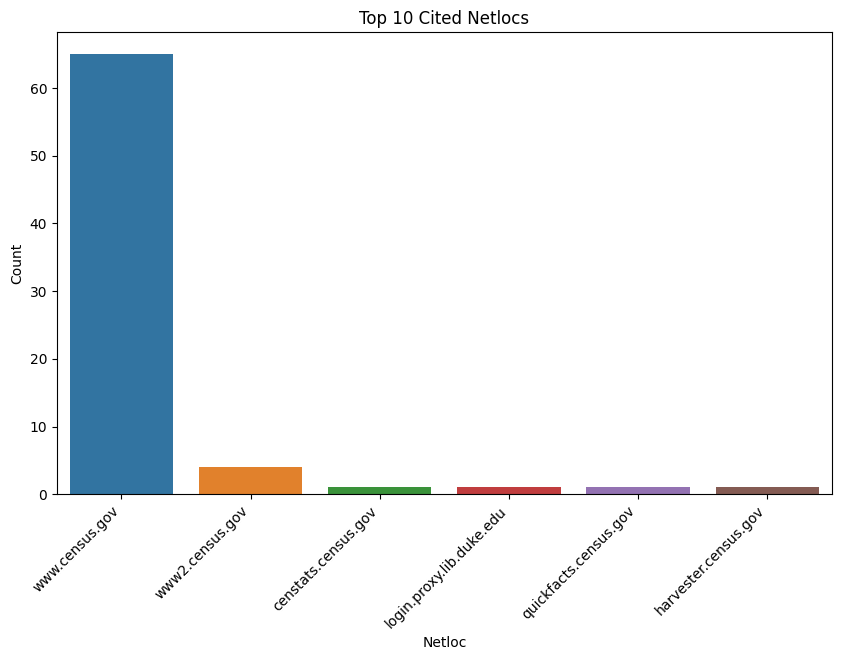

In [71]:
# Plot netloc distribution (top 10)
plt.figure(figsize=(10, 6))
top_netlocs = c_parsed_links['Netloc'].value_counts().nlargest(10)
sns.barplot(x=top_netlocs.index, y=top_netlocs.values)
plt.title('Top 10 Cited Netlocs')
plt.xlabel('Netloc')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [72]:
c_query = c_parsed_links.replace('', pd.NA).dropna(subset=['Query'])
print(c_query)

                                                  URL Scheme  \
15  /customredirect.aspx?url=http%3a%2f%2ffactfind...   <NA>   
19  /customredirect.aspx?url=http%3a%2f%2ffactfind...   <NA>   
20  https://www.census.gov/search-results.html?sea...  https   
21  https://www.census.gov/search-results.html?sea...  https   
25  https://login.proxy.lib.duke.edu/login?url=htt...  https   
28  /customredirect.aspx?url=http%3a%2f%2ffactfind...   <NA>   

                      Netloc                  Path  \
15                      <NA>  /customredirect.aspx   
19                      <NA>  /customredirect.aspx   
20            www.census.gov  /search-results.html   
21            www.census.gov  /search-results.html   
25  login.proxy.lib.duke.edu                /login   
28                      <NA>  /customredirect.aspx   

                                                Query  
15  url=http%3a%2f%2ffactfinder2.census.gov%2fbkmk...  
19  url=http%3a%2f%2ffactfinder2.census.gov%2fbkmk...  
20  

Cited Query parameters distribution:
Query_Params
2    3
3    2
1    1
Name: count, dtype: int64


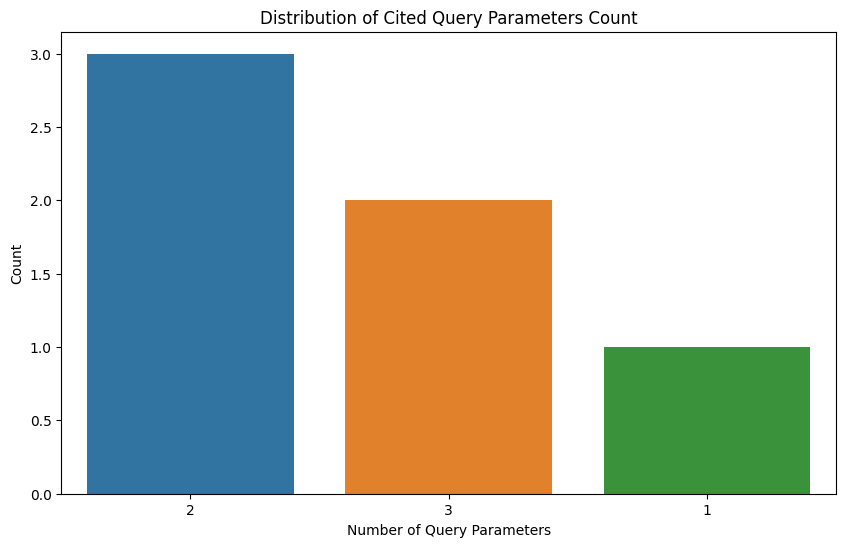

In [73]:
# Extract and count unique query parameters
c_query['Query_Params'] = c_query['Query'].apply(lambda x: len(x.split('&')) if x else 0)
query_params_distribution = c_query['Query_Params'].value_counts()
print("Cited Query parameters distribution:")
print(query_params_distribution)

# Plot query parameters distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=c_query, x='Query_Params', order=c_query['Query_Params'].value_counts().index)
plt.title('Distribution of Cited Query Parameters Count')
plt.xlabel('Number of Query Parameters')
plt.ylabel('Count')
plt.show()

In [74]:
# 1. Identify the most common URL Queries
c_query = c_query['Query']
c_query_counts = Counter(c_query)
c_most_common_query = c_query_counts.most_common(15)

print("\nMost common Cited URL Queries:")
for path, count in c_most_common_query:
    print(f"{path}: {count}")


Most common Cited URL Queries:
searchtype=web&cssp=serp&q=lake%20orion%20village,%20michigan: 2
url=http%3a%2f%2ffactfinder2.census.gov%2fbkmk%2fqs%2f1.0%2fen%2fgeo_search%3a94002&pp=259674: 1
url=http%3a%2f%2ffactfinder2.census.gov%2fbkmk%2fqs%2f1.0%2fen%2fgeo_search%3a95129&pp=166: 1
url=https://www.census.gov/library/publications/time-series/statistical_abstracts.html: 1
url=http%3a%2f%2ffactfinder2.census.gov%2fbkmk%2fqs%2f1.0%2fen%2fgeo_search%3a95014&pp=435711: 1


In [75]:
tables, counts = zip(*c_most_common_query)
# Create a DataFrame from the tables and counts
data = {'Census Table': tables, 'Number of References': counts}
df = pd.DataFrame(data)

# Create an interactive horizontal bar chart
fig = px.bar(df, 
             x='Number of References', 
             y='Census Table', 
             orientation='h',  # Horizontal bars
             title="October Top 15 Most Referenced Queries in Cited Instances",
             labels={'Number of References': 'Number of References', 'Census Table': 'Census Table'},
             color='Number of References',  # Color bars based on count
             text='Number of References')  # Show count on hover

# Customize the hover data (you can modify this to include more details)
fig.update_traces(texttemplate='%{text}', textposition='outside')

# Invert the y-axis to show the highest count at the top
fig.update_yaxes(categoryorder='total descending')

# Show the interactive plot
fig.show()